## Primeros pasos
Para empezar a analizar esta base de datos será necesario primero cargar el archivo y realizar los imports necesarios:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Datos/datos_negocios.csv',  sep=',', decimal='.')
df

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,NaN,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Water Purification Services, Water Heater Inst...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Books, Mags, Music & Video, Shopping",NaN
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Barbers","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1..."


## Negocios más grandes
A continuación se muestran los negocios ordenados por la cantidad de locales que poseen.

In [2]:
df1 = pd.DataFrame()
df1['repes'] = df['nombre'].value_counts()
df1['nombre'] = df1.index
df1

,repes,nombre
Starbucks,1066,Starbucks
McDonald's,806,McDonald's
Subway,768,Subway
Tim Hortons,333,Tim Hortons
Pizza Hut,320,Pizza Hut
...,...,...
Salvaged Beauty Noda,1,Salvaged Beauty Noda
The Grandview at Las Vegas,1,The Grandview at Las Vegas
Justin Noda - The Mortgage Centre,1,Justin Noda - The Mortgage Centre
M & T Auto Body & Automotive Service Center,1,M & T Auto Body & Automotive Service Center


## Franquicias
Para posteriores análisis sería conveniente conocer qué negocios tienen más de un local abierto, ya que esta información puede ser útil para análisis más detallados.

In [3]:
franquicias = df1[df1['repes'] > 1]
franquicias

,repes,nombre
Starbucks,1066,Starbucks
McDonald's,806,McDonald's
Subway,768,Subway
Tim Hortons,333,Tim Hortons
Pizza Hut,320,Pizza Hut
...,...,...
GoodLife Vapes,2,GoodLife Vapes
Milgard Windows and Doors,2,Milgard Windows and Doors
The Auto Shop,2,The Auto Shop
Tonic Aveda,2,Tonic Aveda


## Negocios con su nota media
A continuación veremos los negocios con la media de su puntuación para poder ver cuáles son los mejores votados y aprovechar estos datos para analizar posteriormente otros aspectos. Comenzaremos hayando la puntuación media de las franquicias mejor valoradas.

In [4]:
aux = pd.DataFrame(df[['nombre','puntuacion']])
df2 = aux.groupby('nombre').mean()
dfmedias = franquicias.merge(df2, left_on='nombre', right_on='nombre')
dfmedias = dfmedias.sort_values(by='puntuacion', ascending=False)
dfmedias

,repes,nombre,puntuacion
3175,3,9Round Fitness,5.0
5142,2,Dynamic Detailing,5.0
5554,2,Brew Tea Bar,5.0
8105,2,Great Choice Chiropractic,5.0
5154,2,Room Concepts,5.0
...,...,...,...
6361,2,Apria Healthcare Group,1.0
2230,4,Ticketmaster,1.0
8200,2,Direct Television,1.0
2317,4,Bell Canada,1.0


### Puntuación de franquicias con mayor número de locales abiertos
También se mostrará la valoración media de franquicias con el mayor número de locales abiertos:

In [5]:
dfmedias = dfmedias.sort_values(by='repes', ascending=False)
dfmedias

,repes,nombre,puntuacion
0,1066,Starbucks,3.257036
1,806,McDonald's,2.039082
2,768,Subway,2.673828
3,333,Tim Hortons,2.695195
4,320,Pizza Hut,2.173437
...,...,...,...
7945,2,Cowtown Boots,3.750000
4667,2,Suzette Brittany Bistro,3.750000
7937,2,Cottage Cafe,3.750000
7929,2,TrimBody M.D.,3.750000


## Puntuación más alta de todos los negocios
Aquí se mostrarán los negocios con mayor puntuación, independientemente del número de locales que posea este negocio.

In [6]:
dfmediastotales = df1.merge(df2, left_on='nombre', right_on='nombre')
dfmediastotales = dfmediastotales.sort_values(by='puntuacion', ascending=False)
dfmediastotales

,repes,nombre,puntuacion
18297,1,Your Local Roofing Company,5.0
115132,1,Terry Cavaretta Trapeze Experience,5.0
22569,1,Springvale Golf Course and Ballroom,5.0
22568,1,Candy Face Painting,5.0
47137,1,Nail Junkies,5.0
...,...,...,...
29260,1,Electronics TV Repair,1.0
123993,1,Parents Canada Sweet Deals,1.0
124005,1,Presidential Arms Apartments,1.0
29281,1,Nevada Energy,1.0


## Puntuación de negocios abiertos
Tanto de los negocios más grandes, como de todos los negocios en general:

## Locales en cada ciudad

In [7]:
locales_por_ciudad = pd.DataFrame()
locales_por_ciudad['repes'] = df['ciudad'].value_counts()
locales_por_ciudad['nombre'] = locales_por_ciudad.index
locales_por_ciudad.head(15)

,repes,nombre
Las Vegas,29370,Las Vegas
Toronto,18906,Toronto
Phoenix,18766,Phoenix
Charlotte,9509,Charlotte
Scottsdale,8837,Scottsdale
Calgary,7736,Calgary
Pittsburgh,7017,Pittsburgh
Montréal,6449,Montréal
Mesa,6080,Mesa
Henderson,4892,Henderson


## Los más populares de Charlotte

In [8]:
dfCharlotte = df[df['ciudad'] == "Charlotte"]
dfCharlotte = dfCharlotte.drop(['ciudad', 'estado'], axis=1)
populares_charlotte = dfCharlotte[dfCharlotte['num_revisiones'] >= 500]
populares_charlotte

,negocio_id,nombre,direccion,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
4405,d8lmIZIqmBC9oPM8y1dc7Q,Paco's Tacos & Tequila,"6401 Morrison Blvd, Ste 8A",28211,35.156298,-80.830796,4.0,611,1,"{'BusinessParking': ""{'garage': False, 'street...","Tex-Mex, Restaurants, Bars, Mexican, Tacos, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
6941,k-drEjxKmfqllwfY90STfA,Cantina 1511,"4271B Park Rd, Ste B",28209,35.173501,-80.849964,3.5,509,1,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...","Nightlife, Breakfast & Brunch, Bars, Latin Ame...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
9553,ALwAlxItASeEs2vYAeLXHA,Futo Buta,222 Bland St,28203,35.215379,-80.855443,4.0,941,1,"{'DogsAllowed': 'True', 'NoiseLevel': ""u'avera...","Asian Fusion, Ramen, Japanese, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
11562,osSwv6CJy5hDKQdOKeyTow,Ru San's,2440 Park Rd,28203,35.197738,-80.852719,4.0,554,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Sushi Bars, Japanese, Restaurants","{'Monday': '16:30-22:30', 'Tuesday': '16:30-22..."
18498,SHFlELFcEcAOJv_fTAKChQ,Dandelion Market,118 W 5th St,28202,35.228669,-80.842410,4.0,596,1,"{'Alcohol': ""u'full_bar'"", 'RestaurantsAttire'...","Nightlife, Bars, Tapas/Small Plates, Food, Ame...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
21740,gG9z6zr_49LocyCTvSFg0w,Amélie's French Bakery & Café,"2424 N Davidson St, Ste 102",28205,35.241145,-80.812057,4.0,1566,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Coffee & Tea, Food, Cafes, Bakeri...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
24223,aBLx9JlAMq_AuW6VAImSwg,Zada Jane's Corner Cafe,1601 Central Ave,28205,35.220519,-80.811841,3.5,600,1,"{'NoiseLevel': ""u'average'"", 'Caters': 'True',...","Sandwiches, Breakfast & Brunch, American (New)...","{'Monday': '8:0-15:0', 'Tuesday': '8:0-15:0', ..."
27491,T2tEMLpTeSMxLKpxwFdS3g,Cabo Fish Taco,3201 N Davidson St,28205,35.247188,-80.805812,4.0,1095,1,"{'OutdoorSeating': 'True', 'RestaurantsReserva...","Latin American, Mexican, Seafood, Restaurants,...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
29116,WbJ1LRQdOuYYlRLyTkuuxw,Tupelo Honey,1820 South Blvd,28203,35.211178,-80.858604,4.0,1502,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsDeliv...","Breakfast & Brunch, Southern, American (New), ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
29764,yWUBX9Pe6pzh1PjVj04UmQ,Bad Daddy's Burger Bar,1626 East Blvd,28203,35.198972,-80.840871,4.0,505,1,"{'WiFi': ""'free'"", 'Ambience': ""{'romantic': F...","Nightlife, Burgers, Food, Ice Cream & Frozen Y...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


## Locales más populares de Charlotte en un mapa

In [10]:
import folium
m = folium.Map(
    location=[35.208 , -80.831],
    zoom_start=50,
    tiles='OpenStreetMap'
)
for i in populares_charlotte.index:
    folium.Marker([populares_charlotte['latitud'][i] , populares_charlotte['longitud'][i]],
                  popup=populares_charlotte['nombre'][i], 
                  tooltip=populares_charlotte['nombre'][i]).add_to(m)
m

ModuleNotFoundError: No module named 'folium'

## Contraste Puntuación vs revisiones en Charlotte 

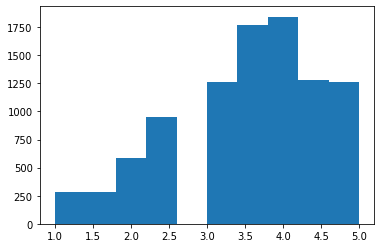

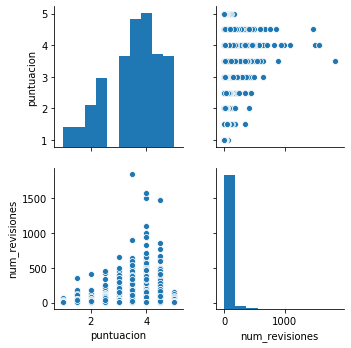

In [11]:
plt.hist(dfCharlotte['puntuacion'])
plt.show()
sns.pairplot(dfCharlotte, vars=["puntuacion", "num_revisiones"]);
plt.show()